In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = {}

all_count_list = []

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    all_count_list.append(len(df[i]))

C:\Users\nexen\AppData\Local\Temp\ipykernel_31524\2842703993.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_31524\2842703993.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_31524\2842703993.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_31524\2842703993.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [7]:
# hypogamy -> 강혼, hypergamy -> 승혼

def getDataFrame(womanMarriageCode):
    context = []

    for i in range(2010, 2022):
        woman_marriaged = df[i][df[i]['아내결혼코드'] == womanMarriageCode]

        woman_marriaged = woman_marriaged.drop(labels = woman_marriaged[woman_marriaged['아내교육코드'].isin([1, 6])].index)

        hypogamy_condition = woman_marriaged['아내교육코드'] > woman_marriaged['남편교육코드']

        woman_edu_revised = woman_marriaged[hypogamy_condition]

        context.append(woman_edu_revised)

    return context

In [10]:
def getAllCountList(womanMarriageCode):
    l = []

    for i in range(2010, 2022):
        woman_marriaged = df[i][df[i]['아내결혼코드'] == womanMarriageCode]

        woman_marriaged = woman_marriaged.drop(labels = woman_marriaged[woman_marriaged['아내교육코드'].isin([1, 6])].index)

        l.append(len(woman_marriaged))

    return l



### 강혼 여성 인원 추세

<BarContainer object of 12 artists>

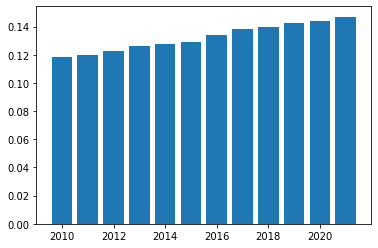

In [15]:
# 시대가 변하면서 강혼에 대한 편견이 많이 사라지지 않았을까?
hypogamy_list_first = getDataFrame(1) 
hypogamy_list_second = getDataFrame(2) 

hypogamy_length_first = [len(x) for x in hypogamy_list_first]

# X축 연도, Y축 해당 연도 강혼 인원 비율 -> plot

list_ratio = []

for i in range(0, 12):
    list_ratio.append(hypogamy_length_first[i] / getAllCountList(1)[i])

plt.bar(x=range(2010, 2022), height = list_ratio)

# 초혼 여성의 경우 뚜렷한 비율 상승세가 나타남

<BarContainer object of 12 artists>

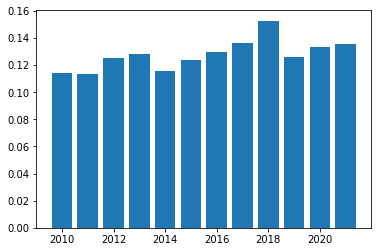

In [16]:
hypogamy_length_second = [len(x) for x in hypogamy_list_second]

list_ratio = []

for i in range(0, 12):
    list_ratio.append(hypogamy_length_second[i] / getAllCountList(2)[i])

plt.bar(x=range(2010, 2022), height = list_ratio)

# 재혼 여성에서는 두드러진 패턴이 나타나지 않음